# Aproximación bayesiana a los sistemas de recomendación

Los módulos que emplearemos son:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

**Basado en el ejemplo de las tragaperras estudiado en clase**

En primer lugar fijamos los parámetros:

* El número de intentos en cada tragaperras: `intentos`.
* La probabilidad de éxito en cada tragaperras: `probabilidades`.

In [2]:
intentos = 2000
probabilidades = [0.2, 0.5, 0.75]  # probabilidades reales (no lo tenemos en la vida real)

Tras esto construimos la clase `Maquina` que modela el funcionamiento de la tragaperras. En la clase encontramos:

* El método `init` para definirla con p el parámetro probabilidad y a y b los parámetros de la beta. Como se trata solo de averiguar en cual es más fácil ganar y no consideramos cuánto se gana usamos una Beta de Bernouilli.

* El método `tirar` que equivale a ejecutar la máquina una vez.

* El método `muestra` que muestrea un valor de la beta.

* El método `actualiza` que permite modificar los parámetros de la beta.

#### To do. Define la clase máquina con sus tres atributos ( p (probabilidad de éxito), a y b (parámetros de beta)

#### To do. Añade a la clase tres nuevos métodos:

* __tira__ (extrae una muestra de la distribución de Bernouilli (distribución real))
* __muestrea__ (extra una muestra de la distribución beta)
* __actualiza__ (actualiza los valores de a y b dependediendo de la muestra)

In [3]:
class Maquina(object):
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
    
    def tirar(self):
        return np.random.random() < self.p
        
    def muestra(self):
        return np.random.beta(self.a, self.b)
        
    def actualiza(self, x):
        self.a += x
        self.b += 1 - x

Defino un método plot para representar gráficamente los resultados extraídos del experimento:

#### To do. Define un método plot que dada una lista con objetos de la clase `Maquina` genere un vector con 200 puntos entre los puntos 0 y 1 para el eje x y representa la distribución de cada máquina en dicho vector:

__Nota.__ La función debe devolver un plot con las tres distribuciones pintadas en la misma ventana.

Ya tenemos todo lo necesario para construir nuestro experimento:

In [33]:
def plot(maquinas, intento):
    x = np.linspace(0.0, 1.0, num=200)
    for maquina in maquinas:
        y = beta.pdf(x, maquina.a, maquina.b)
        plt.plot(x, y, label="real p: %.4f" % maquina.p)
    plt.title("Distribución de la máquina despues de %s intentos" % intento)
    plt.legend()
    plt.show()
    

In [43]:
def experimento():
    
    maquinas = [Maquina(p) for p in probabilidades] #lista de maquinas con sus respectivos ratios de victoria

    puntos_muestra = [5,10,20,50,100,200,500,1000,1500,1999] #iteraciones en las que pintamos
    for intento in range(intentos):
    # Hacemos un intento en cada máquina muestrando una beta
        mejor_maquina = None
        max_muestra = -1 # solo para inicializar
        #crear una lista vacía muestras en la que almacenamos las muestras
        muestras = []
        
        for maquina in maquinas:
            ### EMPIEZA EL EJERCICIO
            muestra = maquina.muestra()#tomo una muestra de la beta de la máquina
            # añado la muestra a las muestras
            muestras.append(muestra)
            
            if (muestra > max_muestra):# si la muestra es la mejor
                max_muestra = muestra
                mejor_maquina = maquina
                
        if intento in puntos_muestra:
            print("Muestras actuales: %s" % muestras)
            plot(maquinas, intento)

        # tiramos de la máquina que pensamos que es la mejor
        x = mejor_maquina.tirar()

        #actualizamos la maquina que creemos que es la mejor
        mejor_maquina.actualiza(x)


Ejecutamos pues el experimento:

Muestras actuales: [0.29573613700366363, 0.6833231303399778, 0.6073900484683866]


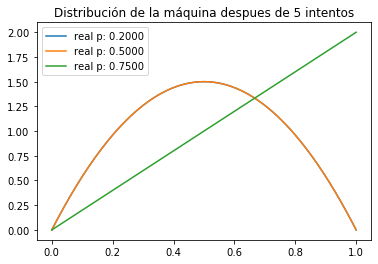

Muestras actuales: [0.4402834620068067, 0.22816773630617518, 0.8727562494897435]


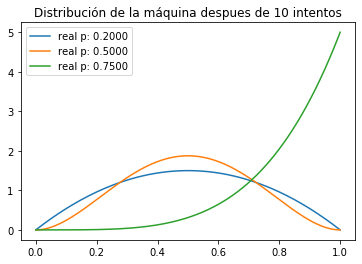

Muestras actuales: [0.768013596522094, 0.5923114987517677, 0.7959023281639329]


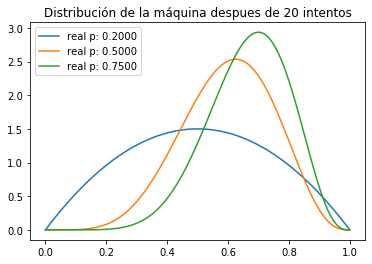

Muestras actuales: [0.2683559868838774, 0.761089421586036, 0.7399957795366251]


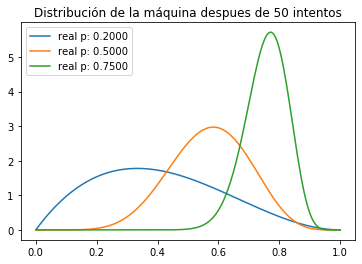

Muestras actuales: [0.6394703587978545, 0.468406716513801, 0.6855431154903618]


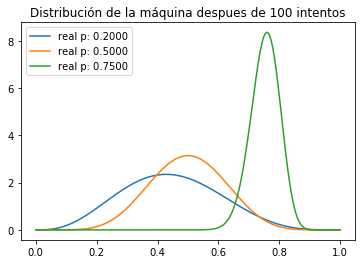

Muestras actuales: [0.19542653814288521, 0.3863484663493067, 0.7325150431297064]


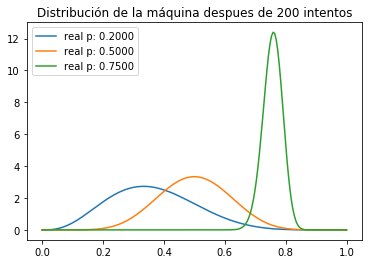

Muestras actuales: [0.20998210545586724, 0.45004449983310374, 0.7801171891677879]


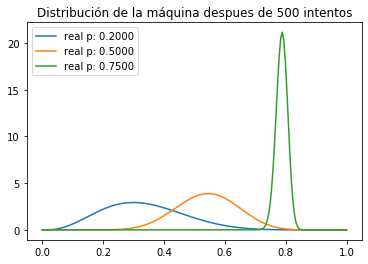

Muestras actuales: [0.532417874484186, 0.5216064394464249, 0.7935780627835238]


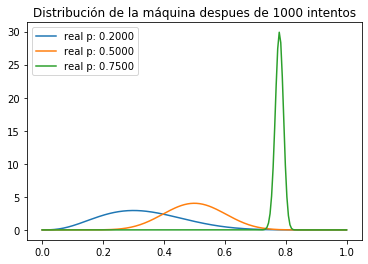

Muestras actuales: [0.4994766733970128, 0.47982288937383627, 0.7701211153553933]


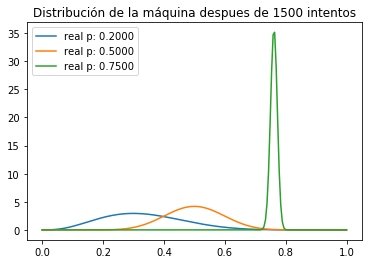

Muestras actuales: [0.2349326037274184, 0.413224562975066, 0.7572691906770459]


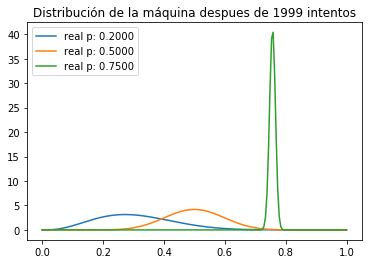

In [44]:
experimento()

## Conclusión

Podemos ver como a medida que vamos avanzando y aumentando el número de muestras las distribuciones convergen a su valor correspondiente y el intervalo de confianza se va estrechando progresivamente. Como la mejor es la verde es aquella en la que obtenemos el mejor intervalo de confianza (más estrecho).